In [1]:
!pip install torchmetrics timm
import gc
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets, models, transforms
import torch
from matplotlib import pyplot as plt
from tensorflow import keras
from cv2 import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import torchmetrics 
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch import nn
from torch.optim import AdamW,Adam # optmizers
import time
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

import seaborn as sns
import os
import glob
import plotly.graph_objects as go
import cv2
from PIL import Image
from PIL import ImageFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
ImageFile.LOAD_TRUNCATED_IMAGES = True

from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.7/548.7 kB 2.5 MB/s eta 0:00:00


In [2]:
X_valid = np.load('../input/cervical-cancer-screening128/X_valid_128.npy',allow_pickle=True)
y_valid = np.load('../input/cervical-cancer-screening128/y_valid_128.npy',allow_pickle=True)
X_train = np.load('../input/cervical-cancer-screening128/X_train_128.npy',allow_pickle=True)
y_train = np.load('../input/cervical-cancer-screening128/y_train_128.npy',allow_pickle=True)

# 데이터

# 데이터 분리

In [3]:
# Train / Validation

#train_df, valid_df = train_test_split(files_df, test_size = 0.2, stratify = files_df['label'], random_state = 1234)

#print(len(train_df), len(valid_df))

In [4]:
#X_train = train_df[['filepath']]
#y_train = train_df[['label']]
#X_train = X_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)

In [5]:
#X_valid = valid_df[['filepath']].reset_index(drop=True)
#y_valid = valid_df[['label']].reset_index(drop=True)

print(len(X_train), len(y_train), len(X_valid),len(y_valid))

6569 6569 1643 1643


# 데이터 전처리

In [6]:
# save train data as npy files

#np.save('/kaggle/working/X_train_25', X_train)
#np.save('/kaggle/working/y_train_25', y_train)

In [7]:
#features = []
#f_app = features.append
#path = train_df['filepath'].values
#labels = train_df['label'].values
#for p in tqdm(path):
#    image = cv2.imread(p)
#    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#    re_image = cv2.resize(image, (128,128))
#    f_app(np.array(re_image))

#X_train = np.array(features)
#y_train = np.array(labels)

In [8]:
# 소요시간줄이는코드 (추가 수정 필요)
#path = train_df['filepath'].values
#labels = train_df['label'].values
#features = [np.array(cv2.resize(cv2.cvtColor(cv2.imread(p),cv2.COLOR_RGB2BGR),(180,180))) for p in tqdm(path)]

In [9]:
# validation data

#features = []
#f_app = features.append
#path = valid_df['filepath'].values
#labels = valid_df['label'].values
#for p in tqdm(path):
#    image = cv2.imread(p)
#    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#    re_image = cv2.resize(image, (128,128))
#    f_app(np.array(re_image))

#X_valid = np.array(features)
#y_valid = np.array(labels)

In [10]:
# save validation data as npy files

#np.save('/kaggle/working/X_valid', X_valid)
#np.save('/kaggle/working/y_valid', y_valid)

In [11]:
# X train data 확인
X_train[0]

array([[[ 71,  81,  90],
        [ 79,  89,  97],
        [ 88, 101, 106],
        ...,
        [ 87,  57,  81],
        [ 90,  58,  82],
        [ 87,  55,  78]],

       [[ 82,  89,  97],
        [ 88,  95, 101],
        [ 96, 107, 111],
        ...,
        [100,  66,  93],
        [ 99,  65,  92],
        [ 93,  60,  88]],

       [[ 79,  83,  94],
        [ 93,  98, 104],
        [107, 114, 120],
        ...,
        [102,  67, 100],
        [ 99,  64,  96],
        [ 98,  63,  93]],

       ...,

       [[ 94,  62,  86],
        [ 75,  47,  69],
        [ 64,  43,  58],
        ...,
        [ 70,  37,  44],
        [ 69,  37,  48],
        [ 67,  36,  51]],

       [[110,  74, 100],
        [ 89,  57,  81],
        [ 77,  49,  71],
        ...,
        [ 53,  24,  28],
        [ 60,  30,  40],
        [ 65,  36,  54]],

       [[120,  84, 110],
        [108,  75,  99],
        [ 95,  63,  87],
        ...,
        [ 51,  23,  35],
        [ 60,  29,  47],
        [ 78,  46,  72]]

In [12]:
# X validation data 확인
X_valid[0]

array([[[ 59,  51,  72],
        [ 57,  49,  67],
        [ 59,  52,  70],
        ...,
        [ 29,  39,  50],
        [ 22,  31,  39],
        [ 28,  36,  45]],

       [[ 61,  53,  72],
        [ 67,  56,  76],
        [ 68,  54,  77],
        ...,
        [ 22,  40,  48],
        [ 25,  39,  48],
        [ 26,  35,  45]],

       [[ 70,  61,  80],
        [ 67,  59,  73],
        [ 71,  59,  79],
        ...,
        [ 25,  38,  54],
        [ 27,  39,  51],
        [ 28,  37,  47]],

       ...,

       [[ 95,  87, 110],
        [101,  93, 117],
        [115, 103, 127],
        ...,
        [ 63,  49,  74],
        [ 60,  47,  67],
        [ 59,  45,  69]],

       [[ 70,  67,  88],
        [ 85,  78, 101],
        [100,  91, 118],
        ...,
        [ 54,  41,  61],
        [ 54,  41,  58],
        [ 55,  42,  60]],

       [[ 50,  48,  68],
        [ 63,  60,  81],
        [ 76,  67,  93],
        ...,
        [ 53,  40,  63],
        [ 52,  39,  59],
        [ 46,  34,  50]]

In [13]:
# 정규화 (0과1사이의값)
X_train = X_train/255
X_valid = X_valid/255

In [14]:
# 정규화한 X train data 확인
X_train[0]

array([[[0.27843137, 0.31764706, 0.35294118],
        [0.30980392, 0.34901961, 0.38039216],
        [0.34509804, 0.39607843, 0.41568627],
        ...,
        [0.34117647, 0.22352941, 0.31764706],
        [0.35294118, 0.22745098, 0.32156863],
        [0.34117647, 0.21568627, 0.30588235]],

       [[0.32156863, 0.34901961, 0.38039216],
        [0.34509804, 0.37254902, 0.39607843],
        [0.37647059, 0.41960784, 0.43529412],
        ...,
        [0.39215686, 0.25882353, 0.36470588],
        [0.38823529, 0.25490196, 0.36078431],
        [0.36470588, 0.23529412, 0.34509804]],

       [[0.30980392, 0.3254902 , 0.36862745],
        [0.36470588, 0.38431373, 0.40784314],
        [0.41960784, 0.44705882, 0.47058824],
        ...,
        [0.4       , 0.2627451 , 0.39215686],
        [0.38823529, 0.25098039, 0.37647059],
        [0.38431373, 0.24705882, 0.36470588]],

       ...,

       [[0.36862745, 0.24313725, 0.3372549 ],
        [0.29411765, 0.18431373, 0.27058824],
        [0.25098039, 0

In [15]:
# 정규화한 X validation data 확인
X_valid[0]

array([[[0.23137255, 0.2       , 0.28235294],
        [0.22352941, 0.19215686, 0.2627451 ],
        [0.23137255, 0.20392157, 0.2745098 ],
        ...,
        [0.11372549, 0.15294118, 0.19607843],
        [0.08627451, 0.12156863, 0.15294118],
        [0.10980392, 0.14117647, 0.17647059]],

       [[0.23921569, 0.20784314, 0.28235294],
        [0.2627451 , 0.21960784, 0.29803922],
        [0.26666667, 0.21176471, 0.30196078],
        ...,
        [0.08627451, 0.15686275, 0.18823529],
        [0.09803922, 0.15294118, 0.18823529],
        [0.10196078, 0.1372549 , 0.17647059]],

       [[0.2745098 , 0.23921569, 0.31372549],
        [0.2627451 , 0.23137255, 0.28627451],
        [0.27843137, 0.23137255, 0.30980392],
        ...,
        [0.09803922, 0.14901961, 0.21176471],
        [0.10588235, 0.15294118, 0.2       ],
        [0.10980392, 0.14509804, 0.18431373]],

       ...,

       [[0.37254902, 0.34117647, 0.43137255],
        [0.39607843, 0.36470588, 0.45882353],
        [0.45098039, 0

In [16]:
# train 개수, 차원 확인
print(len(X_train), len(y_train))
print(X_train.shape)

6569 6569
(6569, 128, 128, 3)


In [17]:
# validation 개수, 차원 확인
print(len(X_valid), len(y_valid))
print(X_valid.shape)

1643 1643
(1643, 128, 128, 3)


In [18]:
# y 라벨링 (string -> int)
le = LabelEncoder().fit(['Type 1', 'Type 2', 'Type 3'])
y_train = le.transform(y_train)
y_valid = le.transform(y_valid)

y_train_onehot = to_categorical(y_train, num_classes=3)
y_valid_onehot = to_categorical(y_valid, num_classes=3)

In [19]:
y_train_onehot[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [20]:
y_valid_onehot[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [21]:
class Depthwise_bn_relu(tf.keras.Model):
    def __init__(self, strides, padding):
        super(Depthwise_bn_relu, self).__init__()

        self.strides = strides
        self.padding = padding

        self.dw = tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), 
                                                  strides=self.strides, 
                                                  padding=self.padding,
                                                  use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, x, training=False):
        x = self.dw(x)
        x = self.bn(x)
        x = self.relu(x)

        return x



class Pointwise_bn_relu(tf.keras.Model):
    def __init__(self, nb_filters):
        super(Pointwise_bn_relu, self).__init__()

        self.nb_filters = nb_filters

        self.pw = tf.keras.layers.Conv2D(self.nb_filters,
                                         kernel_size=(1, 1), 
                                         strides=(1, 1),  
                                         padding='same', 
                                         use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, x, training=False):
        x = self.pw(x)
        x = self.bn(x)
        x = self.relu(x)

        return x


    


class MobilenetV1(tf.keras.Model):
    def __init__(self, nb_class):
        super(MobilenetV1, self).__init__()

        self.nb_class = nb_class
        self.zero_pad = tf.keras.layers.ZeroPadding2D((2, 2))
        self.conv = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

        self.block1 = tf.keras.Sequential()
        self.block1.add(Depthwise_bn_relu(1, 'same'))
        self.block1.add(Pointwise_bn_relu(64))
        self.zero_pad_1 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))
        
        
        self.block2 = tf.keras.Sequential()
        self.block2.add(Depthwise_bn_relu(2, 'valid'))
        self.block2.add(Pointwise_bn_relu(128))
        self.block2.add(Depthwise_bn_relu(1, 'same'))
        self.block2.add(Pointwise_bn_relu(128))
        self.zero_pad_2 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))


        self.block3 = tf.keras.Sequential()
        self.block3.add(Depthwise_bn_relu(2, 'valid'))
        self.block3.add(Pointwise_bn_relu(256))
        self.block3.add(Depthwise_bn_relu(1, 'same'))
        self.block3.add(Pointwise_bn_relu(256))
        self.zero_pad_3 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))


        self.block4 = tf.keras.Sequential()
        self.block4.add(Depthwise_bn_relu(2, 'valid'))
        self.block4.add(Pointwise_bn_relu(512))

        for _ in range(5):
            self.block4.add(Depthwise_bn_relu(1, 'same'))
            self.block4.add(Pointwise_bn_relu(512))

        self.zero_pad_4 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))



        self.block5 = tf.keras.Sequential()
        self.block5.add(Depthwise_bn_relu(2, 'valid'))
        self.block5.add(Pointwise_bn_relu(1024))
        self.block5.add(Depthwise_bn_relu(2, 'same'))
        self.block5.add(Pointwise_bn_relu(1024))


        self.gap = tf.keras.layers.GlobalAveragePooling2D()
        self.reshape = tf.keras.layers.Reshape((1, 1, 1024))
        self.drop = tf.keras.layers.Dropout(0.001)
        self.conv_pred = tf.keras.layers.Conv2D(1000, 
                                                kernel_size=(1, 1), 
                                                strides=(1, 1), 
                                                padding='same', 
                                                activation='softmax')
        self.reshape_2 = tf.keras.layers.Reshape((1000,))

        


    def call(self, x, training=False):
        x = self.zero_pad(x)
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
       
        x = self.block1(x)
        x = self.zero_pad_1(x)

        x = self.block2(x)
        x = self.zero_pad_2(x)

        x = self.block3(x)
        x = self.zero_pad_3(x)

        x = self.block4(x)
        x = self.zero_pad_4(x)

        x = self.block5(x)

        x = self.gap(x)
        x = self.reshape(x)
        x = self.drop(x)
        x = self.conv_pred(x)
        x = self.reshape_2(x)
        
        return x

    


model = MobilenetV1(1000)
model.build((1, 224, 224, 3))
model.summary()

2022-11-22 11:12:01.203527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 11:12:01.205147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 11:12:01.206194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 11:12:01.207713: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "mobilenet_v1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 multiple                  0         
_________________________________________________________________
conv2d (Conv2D)              multiple                  864       
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
sequential (Sequential)      (1, 113, 113, 64)         2720      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin multiple                  0         
_________________________________________________________________
sequential_1 (Sequential)    (1, 56, 56, 128)         

In [22]:
model.compile(
    loss = 'sparse_categorical_crossentropy'
    ,metrics = ['accuracy']
)

In [23]:
BATCH_SIZE = 16
TRAIN_STEPS = len(X_train)//BATCH_SIZE
VAL_STEPS = len(X_valid)//BATCH_SIZE

In [24]:
reduceLR = ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose= 1, mode='max', factor=  0.2, min_lr = 1e-5)

early_stopping = EarlyStopping(monitor='val_accuracy', patience = 20, verbose=1, mode='max', restore_best_weights= True)

checkpoint = ModelCheckpoint('movilenet_v1', monitor='val_accuracy', verbose=1,save_best_only=True, mode= 'max')

In [25]:
# Non-augmentation
train_gen = ImageDataGenerator().flow(X_train, y_train, batch_size = BATCH_SIZE)
valid_gen = ImageDataGenerator().flow(X_valid, y_valid, batch_size = BATCH_SIZE)

history_mov1 = model.fit(
    train_gen
    , steps_per_epoch = TRAIN_STEPS
    , validation_data = valid_gen
    , epochs = 100
    , callbacks = [reduceLR, early_stopping, checkpoint]
)

2022-11-22 11:12:08.038745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-22 11:12:13.351114: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


410/410 [==============================] - 27s 37ms/step - loss: 1.1175 - accuracy: 0.4851 - val_loss: 1.0042 - val_accuracy: 0.5295

Epoch 00001: val_accuracy improved from -inf to 0.52952, saving model to movilenet_v1


2022-11-22 11:12:43.362045: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
410/410 [==============================] - 15s 35ms/step - loss: 1.0024 - accuracy: 0.5198 - val_loss: 2.2712 - val_accuracy: 0.4139

Epoch 00002: val_accuracy did not improve from 0.52952
Epoch 3/100
410/410 [==============================] - 15s 36ms/step - loss: 0.9765 - accuracy: 0.5199 - val_loss: 1.0223 - val_accuracy: 0.5052

Epoch 00003: val_accuracy did not improve from 0.52952
Epoch 4/100
410/410 [==============================] - 14s 35ms/step - loss: 0.9557 - accuracy: 0.5228 - val_loss: 1.1333 - val_accuracy: 0.5295

Epoch 00004: val_accuracy did not improve from 0.52952
Epoch 5/100
410/410 [==============================] - 15s 35ms/step - loss: 0.9310 - accuracy: 0.5272 - val_loss: 1.0390 - val_accuracy: 0.4595

Epoch 00005: val_accuracy did not improve from 0.52952
Epoch 6/100
410/410 [==============================] - 14s 35ms/step - loss: 0.9207 - accuracy: 0.5420 - val_loss: 1.1843 - val_accuracy: 0.4285

Epoch 00006: val_accuracy did not improve from 0.5

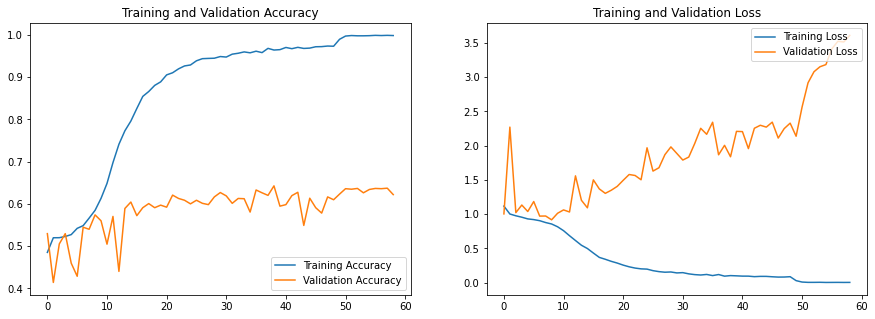

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mov1.history['accuracy'], label='Training Accuracy')
plt.plot(history_mov1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_mov1.history['loss'], label='Training Loss')
plt.plot(history_mov1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255,
                     rotation_range=20,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.1,
                     vertical_flip=True,
                     horizontal_flip=True,
                     fill_mode='nearest')


train_gen_ag = train_datagen.flow(X_train, y_train, batch_size = BATCH_SIZE)

In [28]:
reduceLR = ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose= 1, mode='max', factor=  0.2, min_lr = 1e-5)

early_stopping = EarlyStopping(monitor='val_accuracy', patience = 20, verbose=1, mode='max', restore_best_weights= True)

checkpoint_ag = ModelCheckpoint('movilenet_v1_ag', monitor='val_accuracy', verbose=1,save_best_only=True, mode= 'max')

In [29]:
history_mov1_ag = model.fit(
    train_gen_ag
    , steps_per_epoch= TRAIN_STEPS
    , validation_data=valid_gen
    , validation_steps=VAL_STEPS
    , epochs= 100
    , callbacks= [reduceLR, early_stopping, checkpoint_ag]
)

Epoch 1/100
410/410 [==============================] - 28s 69ms/step - loss: 2.4819 - accuracy: 0.5051 - val_loss: 10.2289 - val_accuracy: 0.3474

Epoch 00001: val_accuracy improved from -inf to 0.34743, saving model to movilenet_v1_ag
Epoch 2/100
410/410 [==============================] - 29s 71ms/step - loss: 1.4506 - accuracy: 0.5120 - val_loss: 11.3578 - val_accuracy: 0.2953

Epoch 00002: val_accuracy did not improve from 0.34743
Epoch 3/100
410/410 [==============================] - 29s 71ms/step - loss: 1.0918 - accuracy: 0.5088 - val_loss: 11.0245 - val_accuracy: 0.3107

Epoch 00003: val_accuracy did not improve from 0.34743
Epoch 4/100
410/410 [==============================] - 29s 70ms/step - loss: 0.9983 - accuracy: 0.5126 - val_loss: 9.9684 - val_accuracy: 0.3719

Epoch 00004: val_accuracy improved from 0.34743 to 0.37194, saving model to movilenet_v1_ag
Epoch 5/100
410/410 [==============================] - 29s 71ms/step - loss: 0.9549 - accuracy: 0.5303 - val_loss: 8.5653 

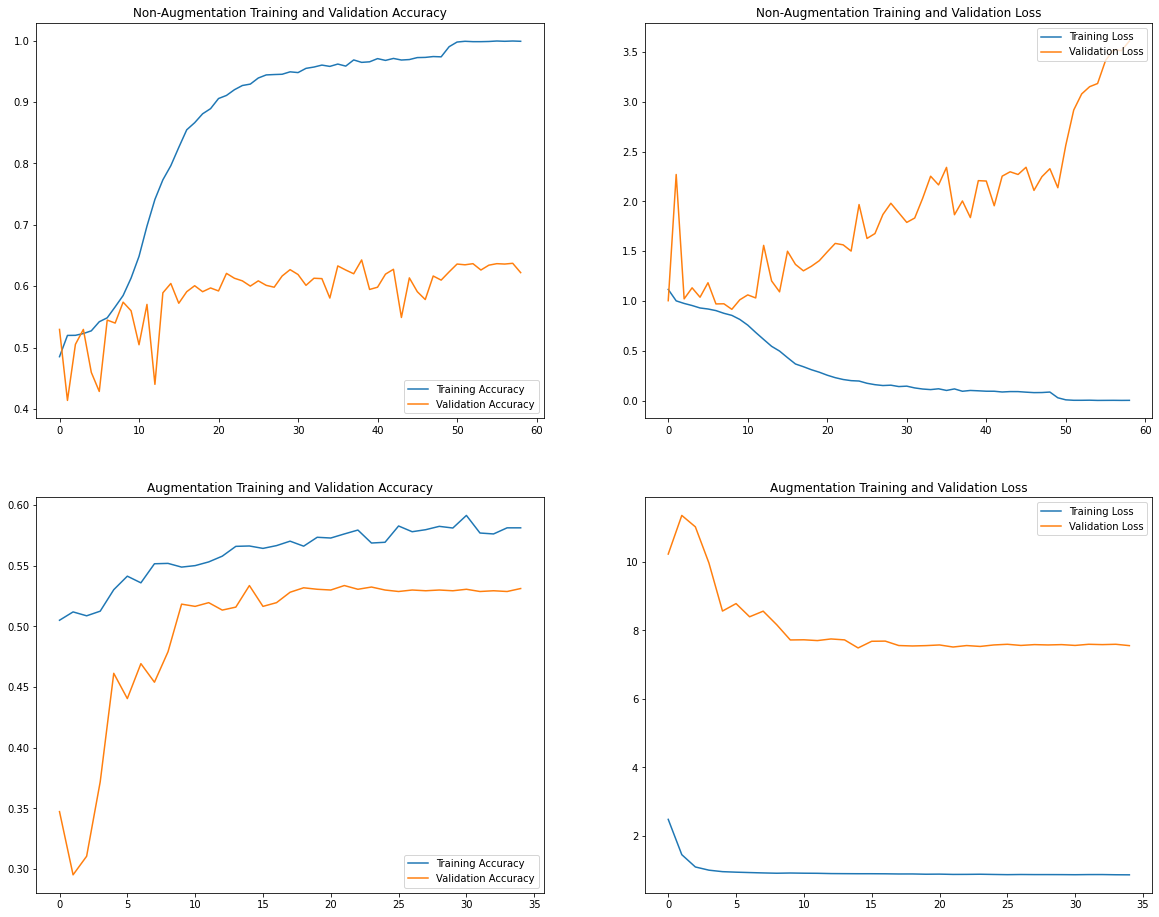

In [30]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.plot(history_mov1.history['accuracy'], label='Training Accuracy')
plt.plot(history_mov1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Non-Augmentation Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(history_mov1.history['loss'], label='Training Loss')
plt.plot(history_mov1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Non-Augmentation Training and Validation Loss')

plt.subplot(2, 2, 3)
plt.plot(history_mov1_ag.history['accuracy'], label='Training Accuracy')
plt.plot(history_mov1_ag.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Augmentation Training and Validation Accuracy')

plt.subplot(2, 2, 4)
plt.plot(history_mov1_ag.history['loss'], label='Training Loss')
plt.plot(history_mov1_ag.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Augmentation Training and Validation Loss')

plt.show()

In [31]:
#이미지 오류남

#stage1 = y_train[y_train == 0].index
#stage2 = y_train[y_train == 1].index
#stage3 = y_train[y_train == 2].index

#

#stage1 = np.where(y_train == 0)
#type(stage1)
#stageq = stage1[0]

#stage2 = np.where(y_train == 1)
#type(stage2)
#stagew = stage2[0]

#stage3 = np.where(y_train == 2)
#type(stage3)
#stagee = stage3[0]

#

#plt.figure(figsize=(20, 20))

#for i in range(16):
#    plt.subplot(4, 4, i+1)
#    plt.suptitle('Type1 Images', fontsize=20) # 하나의 큰 제목 설정
#    plt.imshow(X_train[stageq[i]])
#    plt.title('Type1')
#    plt.subplots_adjust(hspace=0.5)
#    plt.axis(False)
#plt.show()

#

#plt.figure(figsize=(20, 20))

#for i in range(16):
#    plt.subplot(4, 4, i+1)
#    plt.suptitle('type2 Images', fontsize=20) # 하나의 큰 제목 설정
#    plt.imshow(X_train[stagew[i]])
#    plt.title('type2')
#    plt.subplots_adjust(hspace=0.5)
#    plt.axis(False)
#plt.savefig('type2.png', dpi=300)
#plt.show()

#

#plt.figure(figsize=(20, 20))
#
#for i in range(16):
#    plt.subplot(4, 4, i+1)
#    plt.suptitle('type3 Images', fontsize=20) # 하나의 큰 제목 설정
#    plt.imshow(X_train[stagee[i]])
#    plt.title('type3')
#    plt.subplots_adjust(hspace=0.5)
#    plt.axis(False)
#plt.savefig('type3.png', dpi=300)
#plt.show()

In [32]:
# 참고용
# double

#history_df_cnn = pd.DataFrame(historycnn.history)
#history_df_dnn = pd.DataFrame(historydnn.history)

#plt.figure(figsize= (15,6))
#plt.subplot(1,2,1)
#plt.plot(history_df_cnn['accuracy'], label= 'cnn_accuracy' )
## plt.plot(history_df_cnn['val_accuracy'], label= 'val_accuracy')
#plt.plot(history_df_dnn['accuracy'], label= 'dnn_accuracy', color='limegreen' )
## plt.plot(history_df_dnn['val_accuracy'], label= 'val_accuracy', color='limegreen')
## history_df[['acc', 'val_acc']]
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.title('Training and Validation Accuracy History')
#plt.legend()

# display history of loss
#plt.subplot(1,2,2)
#plt.plot(history_df_cnn['loss'], label= 'cnn_loss')
##plt.plot(history_df_cnn['val_loss'], label= 'val_loss')
#plt.plot(history_df_dnn['loss'], label= 'dnn_loss', color='limegreen')
##plt.plot(history_df_dnn['val_loss'], label= 'val_loss', color='limegreen')
# history_df[['loss', 'val_loss']].plot()
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.title('Training and Validation Loss History')
#plt.legend()
#plt.savefig('fig2.png', dpi=300)
#plt.show()


In [33]:
#plt.figure(figsize= (6,6))
#plt.plot(history_df_cnn['accuracy'], label= 'cnn_accuracy' )
##plt.plot(history_df_cnn['val_loss'], label= 'val_loss')
##plt.plot(history_df_dnn['loss'], label= 'dnn_loss', color='limegreen')
##plt.plot(history_df_dnn['val_loss'], label= 'val_loss', color='limegreen')
## history_df[['loss', 'val_loss']].plot()
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.title('Training and Validation Loss History')
#plt.legend()
#plt.savefig('cnnaccuracy.png', dpi=300)
#plt.show()

# test data (2차에 활용)

In [34]:
# test data

#test_y = pd.read_csv("../input/intel-mobileodt-cervical-cancer-screening/solution_stg1_release.csv")
#test_y.loc[1,['Type_1','Type_2','Type_3']]

#root_dir = '../input/intel-mobileodt-cervical-cancer-screening'
#test_dir = os.path.join(root_dir,'test', 'test')

#test_type = []
#test_features = []
#i=0
#for fn in test_y[['image_name']].to_numpy():
#    for filename in fn:
#        filepath = os.path.join(test_dir,filename)
#        #print(filepath)
#        img = cv2.imread(filepath)
#        resized_img = cv2.resize(img, (180, 180))
#        test_features.append(np.array(resized_img))
#        test_type.append(np.array(test_y.loc[i,['Type_1','Type_2','Type_3']]))
#        i=i+1
    
#print( len(test_features))

In [35]:
#test_y = pd.read_csv("../input/intel-mobileodt-cervical-cancer-screening/solution_stg1_release.csv")
#test_y.loc[1,['Type_1','Type_2','Type_3']]

In [36]:
#y_test = test_y.loc[:,['Type_1','Type_2','Type_3']]
#y_test
#import tensorflow as tf

In [37]:
#y_train_onehot

In [38]:
#print(y_test)
#list = []
#for d in y_test.index:
#    res = y_test.loc[d,:].values.tolist()
#    list.append(res)

In [39]:
#y_test = np.array(list)
#y_test

In [40]:
# normalize test features
#test_X = np.array(test_features)
#X_test = test_X/255

In [41]:
#print(cnn.evaluate(X_test, y_test))
#print(dnn.evaluate(X_test, y_test))